### EJEMPLO MANUAL DE CATEGORIZACIÓN POR ERROR RELATIVO DE KRIGING SIMPLE

En este ejemplo revisaremos el formulismo estudiado en capsulas anteriores, respecto al método de categorización por error relativo de kriging simple.

*H. Hernández G. Curso CRMVK, Nube Minera, 2019.*

**I. Información de las muestras y modelo variografico:**

In [1]:
import pandas as pd
import numpy as np

datos = {'este': [15,19,18], 'norte': [25,30,27], 'variable': [1,2,np.nan]}
df = pd.DataFrame(data=datos)
df.rename(index={0:'m1', 1:'m2', 2:'z*(x)'}, inplace=True)
df.head()

,este,norte,variable
m1,15,25,1.0
m2,19,30,2.0
z*(x),18,27,NaN


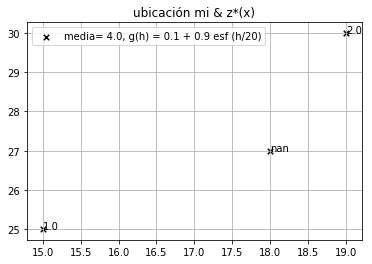

In [3]:
import matplotlib.pyplot as plt

x = df['este']
y = df['norte']
z = df['variable']

fig, ax = plt.subplots()
ax.scatter(x,y,marker='x', s=30, c='black', label='media= 4.0, g(h) = 0.1 + 0.9 esf (h/20)')

for i, txt in enumerate(z):
    ax.annotate(txt, (x[i], y[i]))
    
plt.title('ubicación mi & z*(x)')
plt.legend(loc='upper left')
plt.grid()

**II. Preparación del modelo de covarianzas para Kriging Simple:**

In [4]:
#Distancias:

m1m1 = 0
m1m2 = np.sqrt((19-15)**2 + (30-25)**2)
m1z = np.sqrt((18-15)**2 + (27-25)**2)
m2m1 = np.sqrt((19-15)**2 + (30-25)**2)
m2m2 = 0
m2z = np.sqrt((19-18)**2 + (30-27)**2)

#Semivarianzas: 0.1 + 0.9 esf (h/20)

a = 20
c0 = 0.1
c1 = 0.9
ct = c0 + c1

g_m1m1 = 0 #por propiedad del variograma si h= 0; gamma(h) = 0
g_m1m2 = (((1.5*m1m2/a) - (0.5*(m1m2/a)**3))*c1)+c0
g_m1z = (((1.5*m1z/a) - (0.5*(m1z/a)**3))*c1)+c0
g_m2m1 = (((1.5*m1m2/a) - (0.5*(m1m2/a)**3))*c1)+c0
g_m2m2 = 0
g_m2z = (((1.5*m2z/a) - (0.5*(m2z/a)**3))*c1)+c0

#Covarianzas = c(h): ct - gamma(h)

c_m1m1 = ct - g_m1m1
c_m1m2 = ct - g_m1m2
c_m1z = ct - g_m1z
c_m2m1 = ct - g_m2m1
c_m2m2 = ct - g_m2m2
c_m2z = ct - g_m2z

**III. Solución del sistema de ecuaciones de KS:**

In [5]:
ma =np.array([[c_m1m1, c_m1m2], [c_m2m1, c_m2m2]])
mb = np.array([c_m1z, c_m2z])

ms = np.linalg.solve(ma,mb)
ms

array([0.42639741, 0.48256428])

**IV. Categorización de z*(x):**

In [12]:
a = ms[0]
b= ms[1]
c = (1-(a+b))

m1 = 1
m2 = 2
mg = 4

zx = ((a*m1) + (b*m2) + (c*mg))
zx0 = round(zx, 3)

var = ct - ((a*c_m1z) + (b*c_m2z))

des = np.sqrt(var)

cv = (des*1.96)/zx0

if cv > 0.5:
    print("CV:", round(cv,2), "equivalente a un punto inferido con un 95% de confianza")
elif cv < 0.25:
    print("CV:", round(cv,2),"equivalente a un punto medido con un 95% de confianza")
else:
    print("CV:", round(cv,2),"equivalente a un punto indicado con un 95% de confianza")

CV: 0.69 equivalente a un punto inferido con un 95% de confianza
